In [ ]:
! pip install qiskit==1.0.2 qiskit_aer pylatexenc

In [ ]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, array_to_latex, plot_histogram
from qiskit.circuit.library import Initialize
from qiskit.quantum_info import random_statevector, Statevector
from qiskit.result import marginal_counts
from qiskit_aer import Aer, AerSimulator




from math import pi
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Latex object>

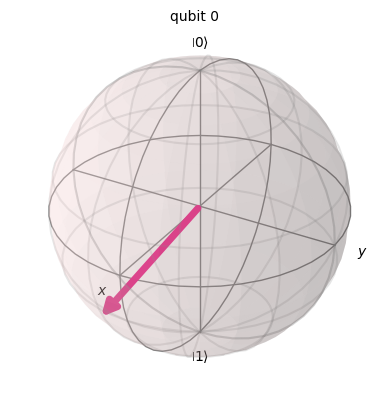

In [ ]:
# Initializing random information for |q0>

psi = random_statevector(2)
init_gate = Initialize(psi)
init_gate.label = "ket-psi"
display(array_to_latex(psi, prefix="|\\psi\\rangle = "))
plot_bloch_multivector(psi)

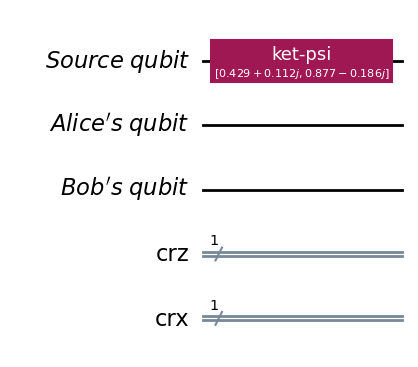

In [ ]:
# Primary setup

data_q = QuantumRegister(1, name = "Source qubit")
alice_q = QuantumRegister(1, name = "Alice's qubit")
bob_q = QuantumRegister(1, name = "Bob's qubit")

crz = ClassicalRegister(1, name='crz')
crx = ClassicalRegister(1, name='crx')
ckt = QuantumCircuit(data_q, alice_q, bob_q, crz, crx)

# assigning ket-psi into |q0>
ckt.append(init_gate, [0])
# ckt.x()
# ckt.rz(pi, 0)

ckt.draw(output='mpl')

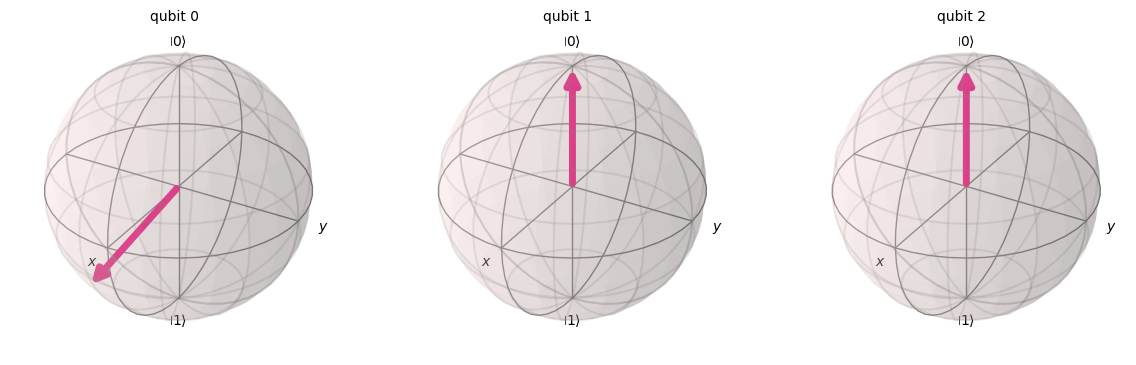

In [ ]:
backend = Aer.get_backend('statevector_simulator')
ckt = transpile(ckt, backend)
job = backend.run(ckt).result()
statevector = job.get_statevector()
plot_bloch_multivector(statevector)

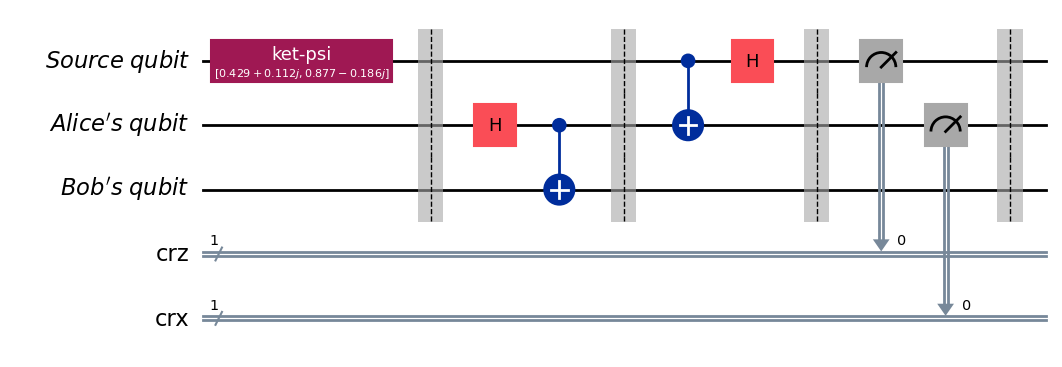

In [ ]:
# EPR pair generation
ckt.barrier()
ckt.h(1)
ckt.cx(1,2)
ckt.barrier()

# Bell state projection on Alice's end
ckt.cx(0, 1)
ckt.h(0)
ckt.barrier()

# measurement
ckt.measure(0, crz)
ckt.measure(1, crx)
ckt.barrier()

ckt.draw(output='mpl')

crx crz:  {'0 0': 1}


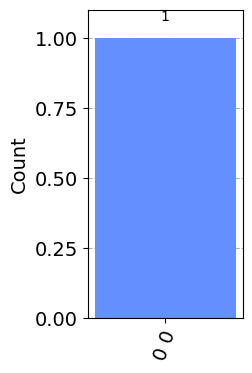

In [ ]:
# Getting the measurement

simulator = AerSimulator()
compiled_ckt = transpile(ckt, simulator)
job = simulator.run(compiled_ckt, shots = 1)
result = job.result()
counts = result.get_counts()
print("crx crz: ",counts)
plot_histogram(counts, figsize=(2,4))

In [ ]:
# Alice's message to Bob (The sequence is: crz crx)
msg = " "
for i,j in counts.items():
  msg = str(i)
msg[::-1]

'0 0'

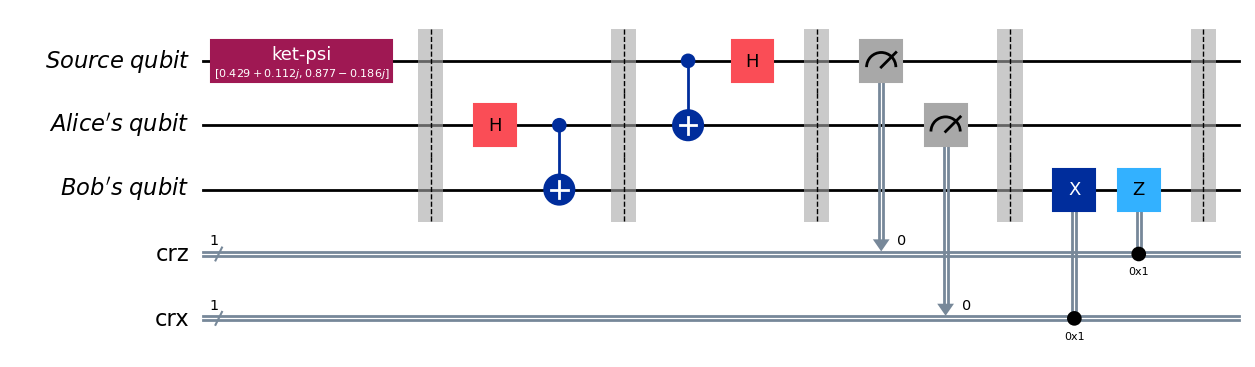

In [ ]:
# Now, Bob's decoding on his end
ckt.x(bob_q[0]).c_if(crx, 1) # if crx = 1, Bob will perform Pauli-X on his qubit
ckt.z(bob_q[0]).c_if(crz, 1) # if crz = 1, Bob will perform Pauli-Z on his qubit
ckt.barrier()

ckt.draw(output='mpl')

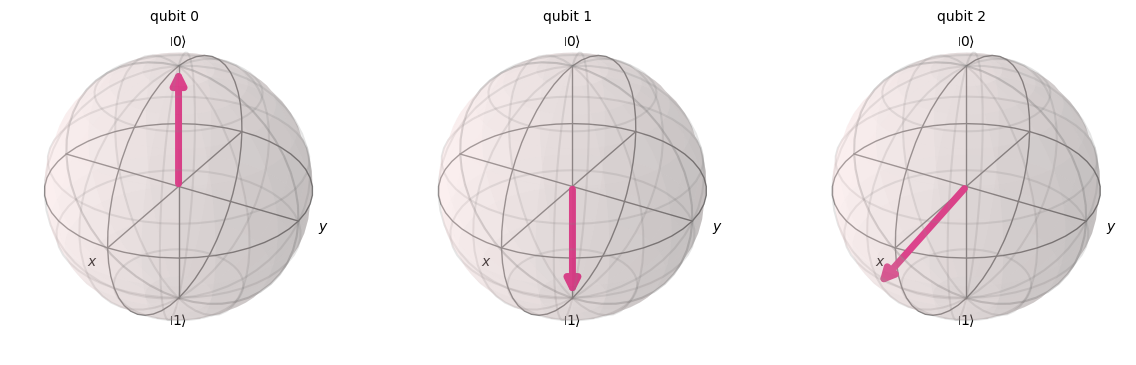

In [ ]:
job = backend.run(ckt).result()
statevector = job.get_statevector()
plot_bloch_multivector(statevector)

Qubit 2 (Bob's qubit) bocomes the source information (qubit). Can't measure the qubit, or it will collapse. But we can verify from Bloch Sphere representation. We can see that the source qubit and the Bob's qubit(qubit 2) are identical. Hence we can say that the teleportation took place.

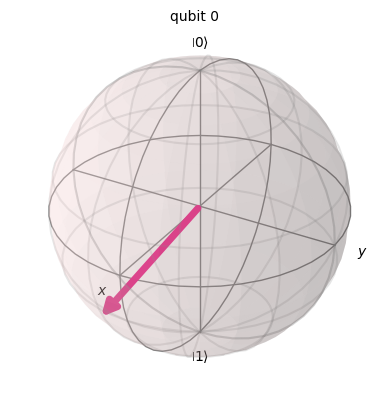

In [ ]:
# Initial Source
plot_bloch_multivector(psi)